In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train= pd.read_csv("C:\\Users\\Shubham\\Downloads\\Titanic\\train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
train["Fare"].fillna(train.Fare.median(), inplace=True)
train["Embarked"].fillna(train.Embarked.mode()[0], inplace=True)

In [5]:
train["Age"].fillna(train.Age.median(), inplace=True)

In [6]:
drop_column=["Cabin"]
train.drop(drop_column, axis=1, inplace=True)

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test= pd.read_csv("C:\\Users\\Shubham\\Downloads\\Titanic\\test.csv")

In [9]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
test["Age"].fillna(test.Age.median(), inplace=True)

In [11]:
test["Fare"].fillna(test.Fare.median(), inplace=True)

In [12]:
drop_column=["Cabin"]
test.drop(drop_column, axis=1, inplace=True)

In [13]:
print("Check data for Nan value in train data")
print(train.isnull().sum())

Check data for Nan value in train data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [14]:
print("check data for Nan Value in Test data")
print(test.isnull().sum())

check data for Nan Value in Test data
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


### Feature Engineering


In [15]:
#Combine all the data together
all_data= [train, test]

In [16]:
for dataset in all_data:
    dataset["Familysize"]= dataset["SibSp"]+dataset["Parch"]+1

In [17]:
import re
#Extract title from passengers name
def get_title(name):
    title_search=re.search('([A-Za-z]+)\.', name)
    #if title exists return it
    if title_search:
        return title_search.group(1)
    return ""
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    

In [18]:
for dataset in all_data:
    dataset["Age_bin"]= pd.cut(dataset["Age"], bins=[0,12,21,40,120], labels=['Childrens','Teenager','Adult','Old'])

In [19]:
for dataset in all_data:
    dataset["Fare_bin"]= pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_Fare','median_fare','average_fare','High_fare'])

In [20]:
traindf=train
testdf=test

In [21]:
all_dat=[traindf, testdf]

In [22]:
traindf= pd.get_dummies(traindf, columns=["Sex","Title","Age_bin","Embarked","Fare_bin"] , prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

drop_column = ['PassengerId']
traindf.drop(drop_column, axis=1, inplace = True)

In [23]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Familysize,...,Age_type_Teenager,Age_type_Adult,Age_type_Old,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_Fare,Fare_type_median_fare,Fare_type_average_fare,Fare_type_High_fare
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,...,0,1,0,0,0,1,1,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,...,0,1,0,1,0,0,0,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,...,0,1,0,0,0,1,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,...,0,1,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,...,0,1,0,0,0,1,0,1,0,0


In [24]:
testdf = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Em_type","Fare_type"])

In [25]:
testdf.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Familysize,Sex_female,...,Age_type_Teenager,Age_type_Adult,Age_type_Old,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_Fare,Fare_type_median_fare,Fare_type_average_fare,Fare_type_High_fare
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,0,...,0,1,0,0,1,0,1,0,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,2,1,...,0,0,1,0,0,1,1,0,0,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,0,...,0,0,1,0,1,0,0,1,0,0
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,1,0,...,0,1,0,0,0,1,0,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,3,1,...,0,1,0,0,0,1,0,1,0,0


In [27]:
drop_column = ['Age','Name','Ticket','Fare']
testdf.drop(drop_column, axis=1, inplace = True)

In [28]:
drop_column = ['Age','Name','Ticket','Fare']
traindf.drop(drop_column, axis=1, inplace = True)

In [29]:
traindf.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Familysize,Sex_female,Sex_male,Title_Master,Title_Miss,...,Age_type_Teenager,Age_type_Adult,Age_type_Old,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_Fare,Fare_type_median_fare,Fare_type_average_fare,Fare_type_High_fare
0,1,0,3,1,0,2,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
1,2,1,1,1,0,2,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,3,1,3,0,0,1,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
3,4,1,1,1,0,2,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,5,0,3,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0


In [30]:
testdf.head()

,PassengerId,Pclass,SibSp,Parch,Familysize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenager,Age_type_Adult,Age_type_Old,Em_type_C,Em_type_Q,Em_type_S,Fare_type_Low_Fare,Fare_type_median_fare,Fare_type_average_fare,Fare_type_High_fare
0,892,3,0,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,893,3,1,0,2,1,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,894,2,0,0,1,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
3,895,3,0,0,1,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
4,896,3,1,1,3,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0


### Co-relation between features

In [40]:
import seaborn as sns

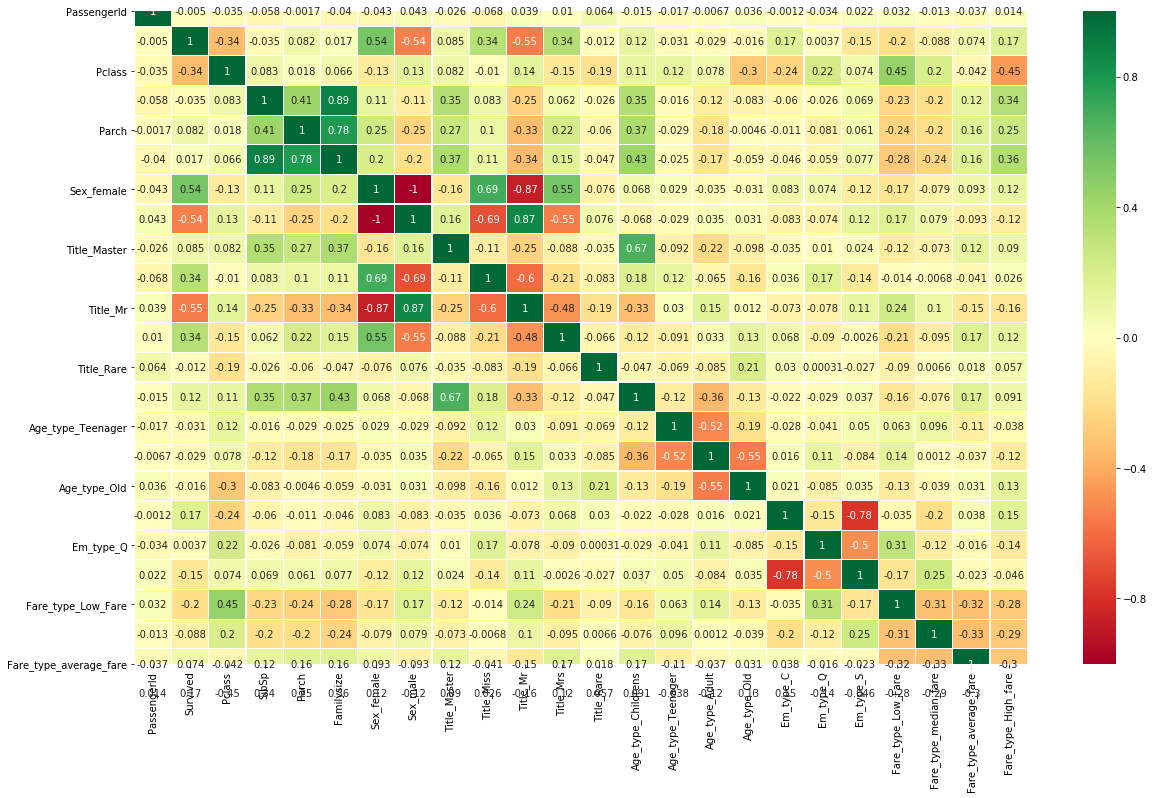

In [45]:
sns.heatmap(traindf.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(20,12)
plt.show()

### Model selection

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold

In [52]:
all_features = traindf.drop("Survived",axis=1)
Targeted_feature = traindf["Survived"]
X_train, X_test, Y_train, Y_test = train_test_split(all_features, Targeted_feature, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((623, 23), (268, 23), (623,), (268,))

### Model


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [57]:
model=RandomForestClassifier(n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

In [59]:
prediction = model.predict(X_test)

In [65]:
print ("Accuracy of RandomForest is:", accuracy_score(prediction, Y_test)*100)

Accuracy of RandomForest is: 81.71641791044776


In [105]:
prediction.shape

(268,)

In [67]:
kFold=KFold(n_splits=10, random_state=22)
result = cross_val_score(model, all_features, Targeted_feature, cv=10, scoring="accuracy")
print("Cross Validated Score of RandomFOrest is:", result.mean()*100)

Cross Validated Score of RandomFOrest is: 82.94092611508341


In [103]:
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
y_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,

Text(0.5, 1.05, 'Confusion matrix\n')

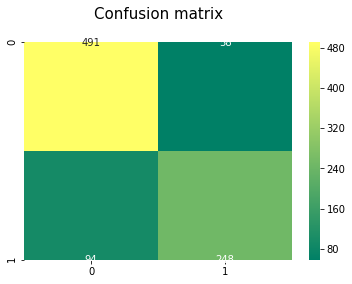

In [106]:
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='d', cmap="summer")
plt.title('Confusion matrix\n', y=1.05, size=15)

In [122]:
drop_column=["PassengerId"]
traindf.drop(drop_column, axis=1, inplace=True)

In [123]:
train_X = traindf.drop("Survived", axis=1)
train_Y = traindf["Survived"]
test_X = testdf.drop("PassengerId", axis=1).copy()

In [124]:
train_X.shape, test_X.shape, train_Y.shape

((891, 22), (418, 22), (891,))

In [125]:
model = RandomForestClassifier()
n_estim=range(100,1000,100)

## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(train_X,train_Y)



# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  45 out of  45 | elapsed:   17.0s finished


0.819304152637486


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Important features
____________________________________________________________
89.0


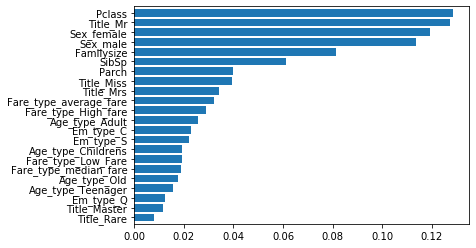

In [132]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

In [136]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred_rf})

submission.to_csv("C:\\Users\\Shubham\\Downloads\\Titanic\\Titanic.csv", index=False)